In [93]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import os
%matplotlib inline

In [6]:
p_base = 'Intermediates-Help/' + '1st problem/'
p_new = p_base + 'Diakanemes'
p_A = p_base + 'pA'
p_B = p_base + 'pB1'

f_A = []
for root, dirs, files in os.walk(p_A):
    for file in files:
        if file.endswith("tif"):
             f_A.append(os.path.join(root, file))
                
f_B = []
for root, dirs, files in os.walk(p_B):
    for file in files:
        if file.endswith("tif"):
             f_B.append(os.path.join(root, file))
                
f_new = []
for root, dirs, files in os.walk(p_new):
    for file in files:
        if file.endswith("tif"):
             f_new.append(os.path.join(root, file))

(Text(0.5,1,'Sobel Norm'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

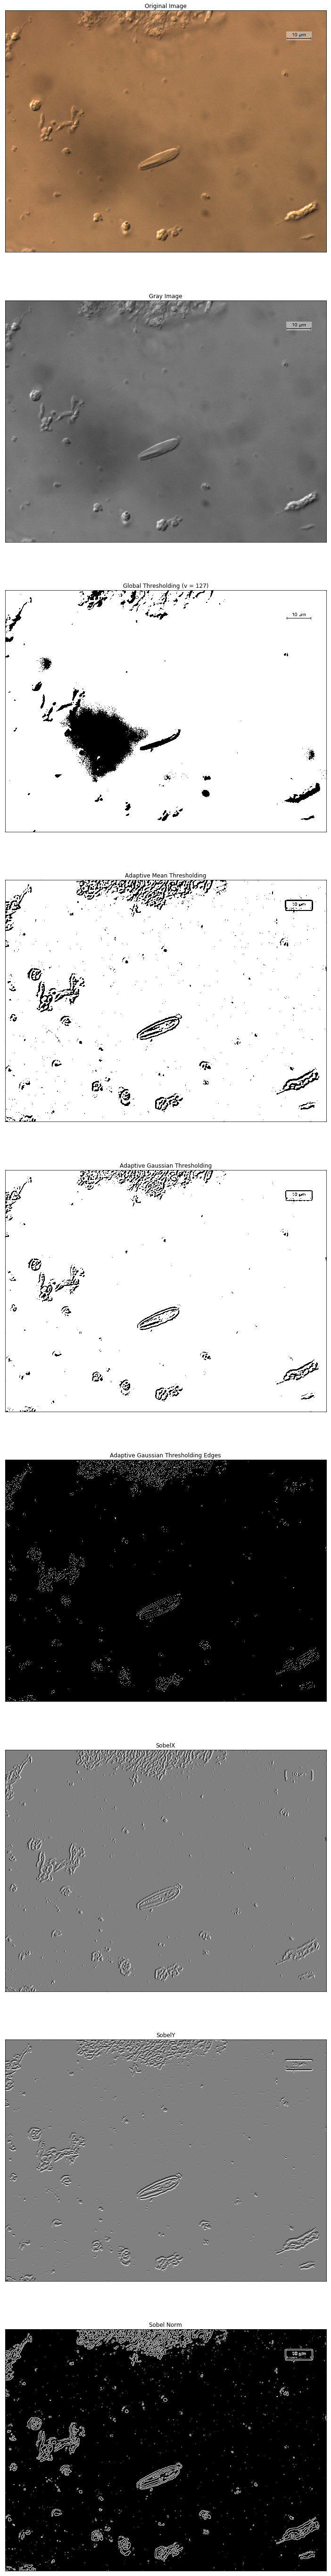

In [285]:
# Read Source Image, the '0' can be changed to switch images
img = cv.imread(f_A[0])

# Convert Image to Grayscale, the proper format for calling other image enhancement functions
grays = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite("grays.jpg", grays)

# Blur Image to smooth out noise
blurred = cv.medianBlur(grays, 5)
cv.imwrite("blurred.jpg", blurred)

# Create Binary Threshold, any pixel above 90 is defaulted to 255, any pixel below 90 is defaulted to 0
binary90 = cv.threshold(grays,90,255,cv.THRESH_BINARY)
cv.imwrite("binary90.jpg", binary90[1])

# Create Adaptive Mean, take the average pixel darkness in an 11x11 block around the pixel, and default to
#  255 if above that average, and 0 if below
adaptivemean = cv.adaptiveThreshold(blurred,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
cv.imwrite("adaptivemean.jpg", adaptivemean)
# Same as Adaptive Mean, except with Gaussian Blur applied beforehand
adaptivegaussian = cv.adaptiveThreshold(blurred,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
cv.imwrite("adaptivegaussian.jpg", adaptivegaussian)

# Applying Canny Edge Detection on best case of the three thresholding above, in this case Adaptive Mean
edges = cv.Canny(adaptivemean,img.shape[0],img.shape[1],4)
cv.imwrite("edges.jpg", edges)

# Applying Sobel Gradient Detection Horizontally and Vertically
sobelx = cv.Sobel(adaptivemean,cv.CV_64F,1,0,ksize=5)
cv.imwrite("sobelx.jpg", sobelx)
sobely = cv.Sobel(adaptivemean,cv.CV_64F,0,1,ksize=5)
cv.imwrite("sobely.jpg", sobely)
sobelnorm = abs(sobelx) + abs(sobely)
cv.imwrite("sobelnorm.jpg", sobelnorm)


plt.figure(figsize=(100,100))

# Print Images
plt.subplot(911),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(912), plt.imshow(grays,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

plt.subplot(913),plt.imshow(binary90[1],cmap = 'gray')
plt.title('Global Thresholding (v = 127)'), plt.xticks([]), plt.yticks([])

plt.subplot(914),plt.imshow(adaptivemean,cmap = 'gray')
plt.title('Adaptive Mean Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(915),plt.imshow(adaptivegaussian,cmap = 'gray')
plt.title('Adaptive Gaussian Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(916),plt.imshow(edges,cmap = 'gray')
plt.title('Adaptive Gaussian Thresholding Edges'), plt.xticks([]), plt.yticks([])

plt.subplot(917),plt.imshow(sobelx,cmap = 'gray')
plt.title('SobelX'), plt.xticks([]), plt.yticks([])

plt.subplot(918), plt.imshow(sobely,cmap = 'gray')
plt.title('SobelY'), plt.xticks([]), plt.yticks([])

plt.subplot(919),plt.imshow(sobelnorm,cmap = 'gray')
plt.title('Sobel Norm'), plt.xticks([]), plt.yticks([])
